In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
#Loading the data
mnist= tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

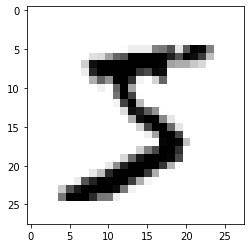

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [ ]:
# x_train[0]

In [ ]:
#Normalize or Scale our data
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
#Building/ defining  the model
model= tf.keras.models.Sequential()
# Now we will add our first layer ie. the input layer and we want our input to be flat, hence we will flatten our image 
model.add(tf.keras.layers.Flatten())
# Now we will add our 2 Hidden Layer also which our DENSE ie. fully conected.
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# Last Layer will have 10 neuron as we have 10 classification.
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [ ]:
#Too summarize your model
model.summary()

ValueError: ignored

In [ ]:
# Now we create parameter to evaluate our model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Now lets train the model.
# model.fit(x_train,y_train,batch_size=100,shuffle=True,epochs=5, verbose=2)

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_split=0.1, verbose=2)

Epoch 1/5
1688/1688 - 3s - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 2/5
1688/1688 - 3s - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0905 - val_accuracy: 0.9773
Epoch 3/5
1688/1688 - 3s - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0964 - val_accuracy: 0.9753
Epoch 4/5
1688/1688 - 3s - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.1126 - val_accuracy: 0.9725
Epoch 5/5
1688/1688 - 3s - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.1089 - val_accuracy: 0.9770


In [ ]:
# Now we want to evaluate our model on the test data.
val_loss, val_accu=model.evaluate(x_test, y_test)
print(val_loss, val_accu)

313/313 [==============================] - 1s 1ms/step - loss: 0.0827 - accuracy: 0.9758
0.08274812251329422 0.9757999777793884


In [ ]:
#Lets Predict using our trained model
Predictions= model.predict(x=x_test,verbose=0)

In [ ]:
Predictions[0]

array([2.8556190e-17, 6.1444713e-13, 2.5213171e-12, 4.7779125e-10,
       2.0856391e-18, 1.1854699e-15, 5.8973212e-22, 1.0000000e+00,
       2.2547323e-13, 2.4626104e-12], dtype=float32)

In [ ]:
#Convertion our Probability prediction into Proper prediction
Rounded_Prediction= np.argmax(Predictions,axis=-1)

Predicted Value= 0


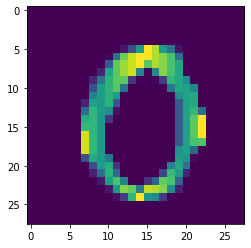

In [ ]:
print('Predicted Value=',Rounded_Prediction[13])
plt.imshow(x_test[13])
plt.show()